In [20]:
df = pd.read_csv('raw_data/df_grouped_rate.csv',encoding='utf-8' )

In [21]:
df

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,2015,1000001,CS100001,3.263885e+09,16.5,2,2,1748,211158,145498,...,188530154.0,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878
1,2015,1000001,CS100002,7.520000e+08,2.0,1,1,1748,211158,145498,...,188530154.0,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290
2,2015,1000001,CS100003,1.650000e+08,2.0,0,0,1748,211158,145498,...,188530154.0,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710
3,2015,1000001,CS100004,1.164048e+09,6.0,1,1,1748,211158,145498,...,188530154.0,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529
4,2015,1000001,CS100005,6.667218e+08,3.5,2,2,1748,211158,145498,...,188530154.0,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000


In [22]:
X=df[df.columns[4:]]
X.columns

Index(['s_store_no_of_store', 's_store_no_of_opening', 's_store_no_of_closing',
       's_work_female', 's_float_male', 's_float_female', 'b_facil_total',
       'b_apt_avg_price', 'b_income_avg_monthly_inc', 'sales_weekday',
       'sales_female', 'sales_2030s', 'sales_06_11', 'sales_11_14',
       'sales_14_17', 'sales_17_21', 'sales_21_24'],
      dtype='object')

In [24]:
y=df["district"]

In [25]:
y=np.array(y)

In [26]:
X=np.array(X)

## Clustering


In [54]:
## KMEANS
from sklearn.cluster import KMeans
model = KMeans( n_clusters=25, random_state=0)
model.fit(X)
y_pred = model.labels_
len(np.unique(y_pred))

25

In [55]:
y=model.fit(X)
y

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [59]:
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

## T-SNE

In [76]:
#from sklearn.manifold import TSNE

#digits_proj = TSNE(n_components=2).fit_transform(X)

In [77]:
#y

In [78]:
#df1= pd.DataFrame(digits_proj)
#df2= pd.DataFrame(y)
#df3= pd.merge(df2, df1, left_index= True, right_index=True)
#df3

In [79]:
#df3.columns=["district","x","y"]
#df3

In [80]:
#df3.to_csv('df4.csv', index=False, encoding='utf-8')

In [81]:
df3= pd.read_csv('df4.csv',encoding='utf-8' )

In [82]:
df3.loc[:,'district'] = df3.district.astype(float)
df3.dtypes

district    float64
x           float64
y           float64
dtype: object

In [83]:
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

In [84]:
X2 = pd.concat([y_pred_df, df3], axis=1)
X2.tail()

,labels,district,x,y
113260,5,1001010.0,53.705574,20.133879
113261,5,1001010.0,53.705574,20.133879
113262,5,1001010.0,53.705574,20.133879
113263,5,1001010.0,53.705303,20.133755
113264,5,1001010.0,53.705303,20.133755


In [85]:
X2.loc[:,'district'] = X2.district.astype(np.float)
X2.loc[:,'labels'] = X2.labels.astype(np.float)

## tsne데이터에 좌표값(상권코드,행정구, 시군구) 추가

In [86]:
maps = pd.read_csv('maps.csv',encoding='utf-8')

In [87]:
X2.columns=["labels","district","x_tsne","y_tsne"]
X2

,labels,district,x_tsne,y_tsne
0,16.0,1000001.0,-33.845062,43.858330
1,16.0,1000001.0,-33.845062,43.858330
2,16.0,1000001.0,-33.845062,43.858330
3,16.0,1000001.0,-33.845062,43.858330
4,16.0,1000001.0,-33.845062,43.858330
...,...,...,...,...
113260,5.0,1001010.0,53.705574,20.133879
113261,5.0,1001010.0,53.705574,20.133879
113262,5.0,1001010.0,53.705574,20.133879
113263,5.0,1001010.0,53.705303,20.133755


In [88]:
maps2=maps[["상권_코드","엑스좌표_값","와이좌표_값","시군구_코드","행정동_코드"]]

In [89]:
maps2.columns=["district","xmap","ymap","C","H"]
np.unique(maps2['district'])

array([1000001, 1000002, 1000003, ..., 1001008, 1001009, 1001010],
      dtype=int64)

In [90]:
X2.loc[:,'district'] = X2.district.astype('int64')
X2

,labels,district,x_tsne,y_tsne
0,16.0,1000001,-33.845062,43.858330
1,16.0,1000001,-33.845062,43.858330
2,16.0,1000001,-33.845062,43.858330
3,16.0,1000001,-33.845062,43.858330
4,16.0,1000001,-33.845062,43.858330
...,...,...,...,...
113260,5.0,1001010,53.705574,20.133879
113261,5.0,1001010,53.705574,20.133879
113262,5.0,1001010,53.705574,20.133879
113263,5.0,1001010,53.705303,20.133755


In [91]:
maps2.loc[:,'district'].dtype

dtype('int64')

In [92]:
maps2.loc[:,'district'] = maps2.district.astype('int64')
df_final = pd.merge(X2, maps2, on=['district'])
df_final.loc[:,'district'] = df_final.district.astype('int64')

#df_final2=df_final.copy()
#df_final2.drop(['x_tsne'], axis=1, inplace =True)
#df_final2.drop(['y_tsne'], axis=1, inplace =True)
#df_final2.drop(['xmap'], axis=1, inplace =True)
#df_final2.drop(['ymap'], axis=1, inplace =True)
df_final

,labels,district,x_tsne,y_tsne,xmap,ymap,C,H
0,16.0,1000001,-33.845062,43.858330,198799,453610,11110,11110600
1,16.0,1000001,-33.845062,43.858330,198799,453610,11110,11110600
2,16.0,1000001,-33.845062,43.858330,198799,453610,11110,11110600
3,16.0,1000001,-33.845062,43.858330,198799,453610,11110,11110600
4,16.0,1000001,-33.845062,43.858330,198799,453610,11110,11110600
...,...,...,...,...,...,...,...,...
113260,3.0,1000996,59.260307,11.630458,211142,449233,11740,11740610
113261,3.0,1000996,59.260307,11.630458,211142,449233,11740,11740610
113262,3.0,1000996,59.260307,11.630458,211142,449233,11740,11740610
113263,3.0,1000996,59.260307,11.630458,211142,449233,11740,11740610


## Visualization

## District

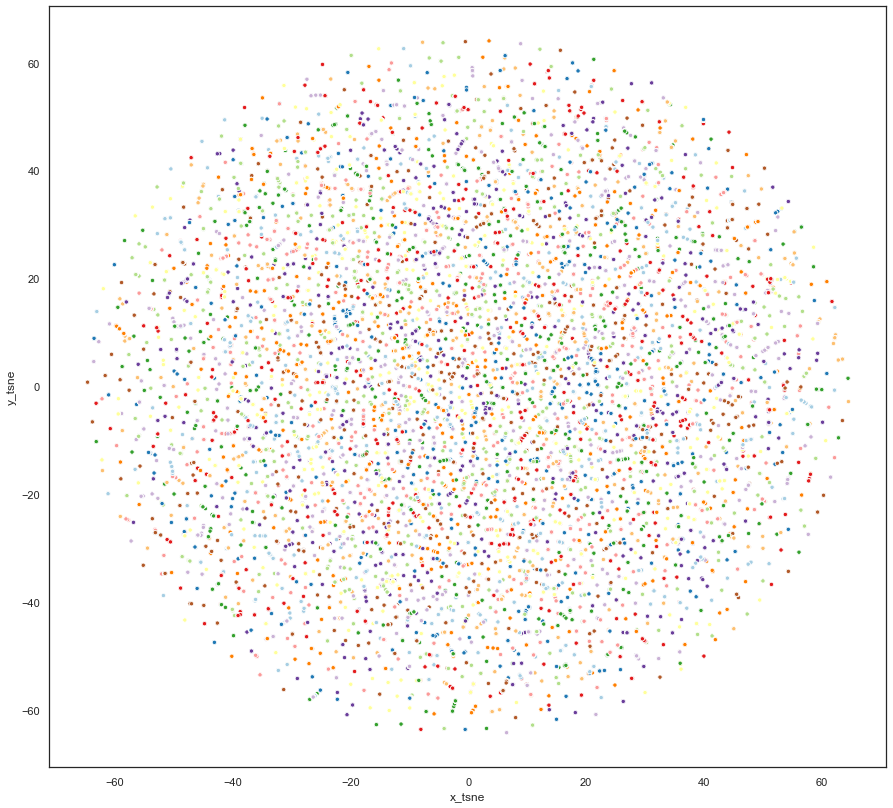

In [95]:
plt.figure(figsize=(15,14))
sns.set_style("white")
sns.scatterplot(x='x_tsne', 

                y='y_tsne', 

                hue='district',

                size=1,
                
                palette=sns.color_palette("Paired", 1007),
               
                legend = False,

                data=df_final)

plt.show()

## 행정동

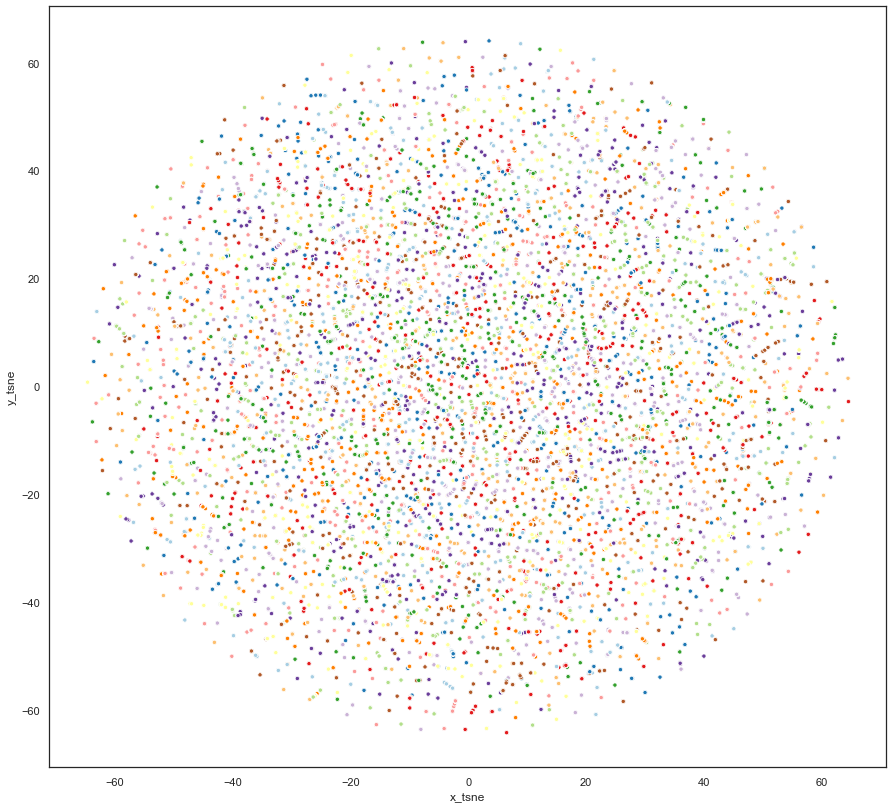

In [96]:
plt.figure(figsize=(15,14))
sns.set_style("white")
sns.scatterplot(x='x_tsne', 

                y='y_tsne', 

                hue='H',

                size=1,
                
                palette=sns.color_palette("Paired", 349),
               
                legend = False,

                data=df_final)

plt.show()

## 시군구

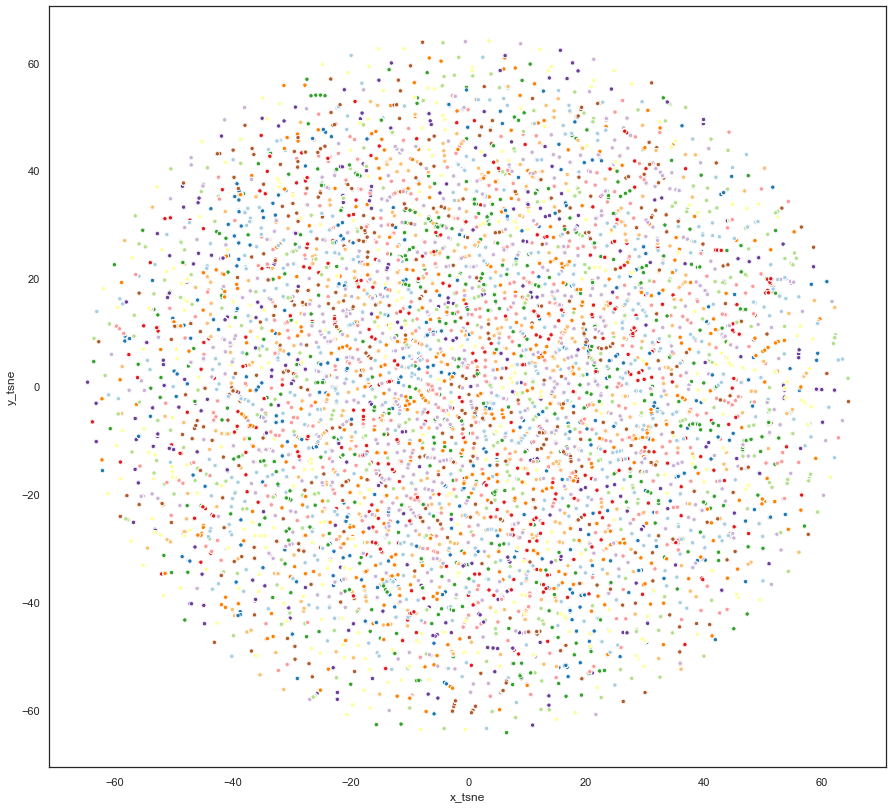

In [97]:
plt.figure(figsize=(15,14))
sns.set_style("white")
sns.scatterplot(x='x_tsne', 

                y='y_tsne', 

                hue='C',

                size=1,
                
                palette=sns.color_palette("Paired", 25),
               
                legend = False,

                data=df_final)

plt.show()

## K_MEANS

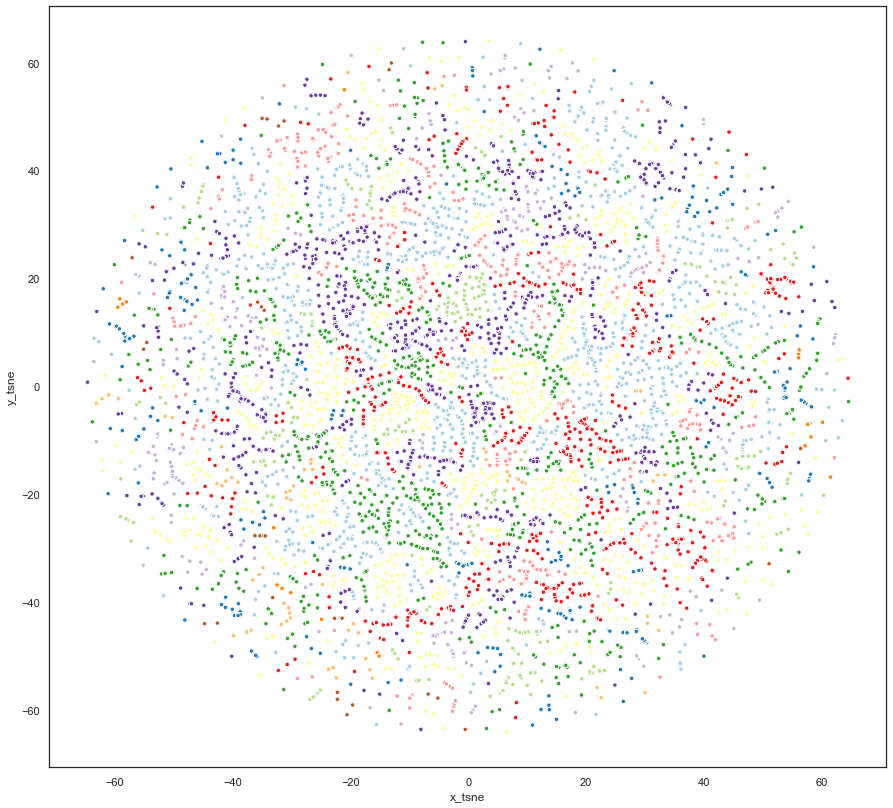

In [98]:
plt.figure(figsize=(15,14))
sns.set_style("white")
sns.scatterplot(x='x_tsne', 

                y='y_tsne', 

                hue='labels',

                size=1,
                
                palette=sns.color_palette("Paired", 25),
               
                legend = False,

                data=df_final)

plt.show()

## 지도에 표현

### district

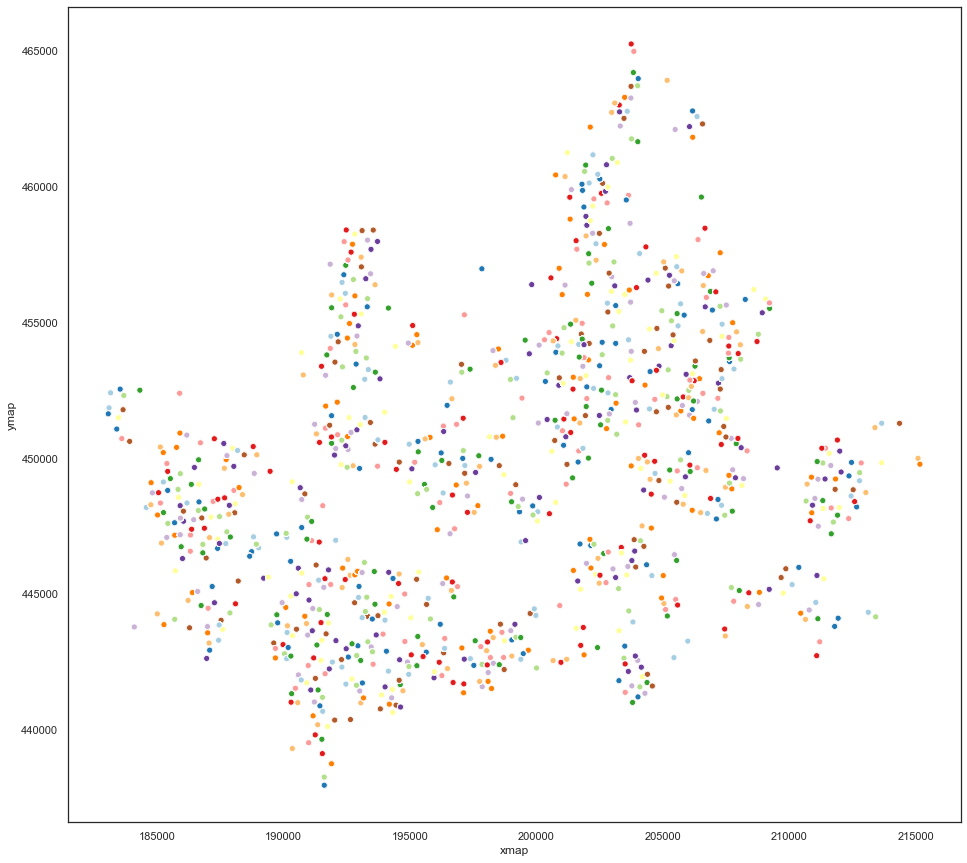

In [99]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='district',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=1007),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_district", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### 행정동

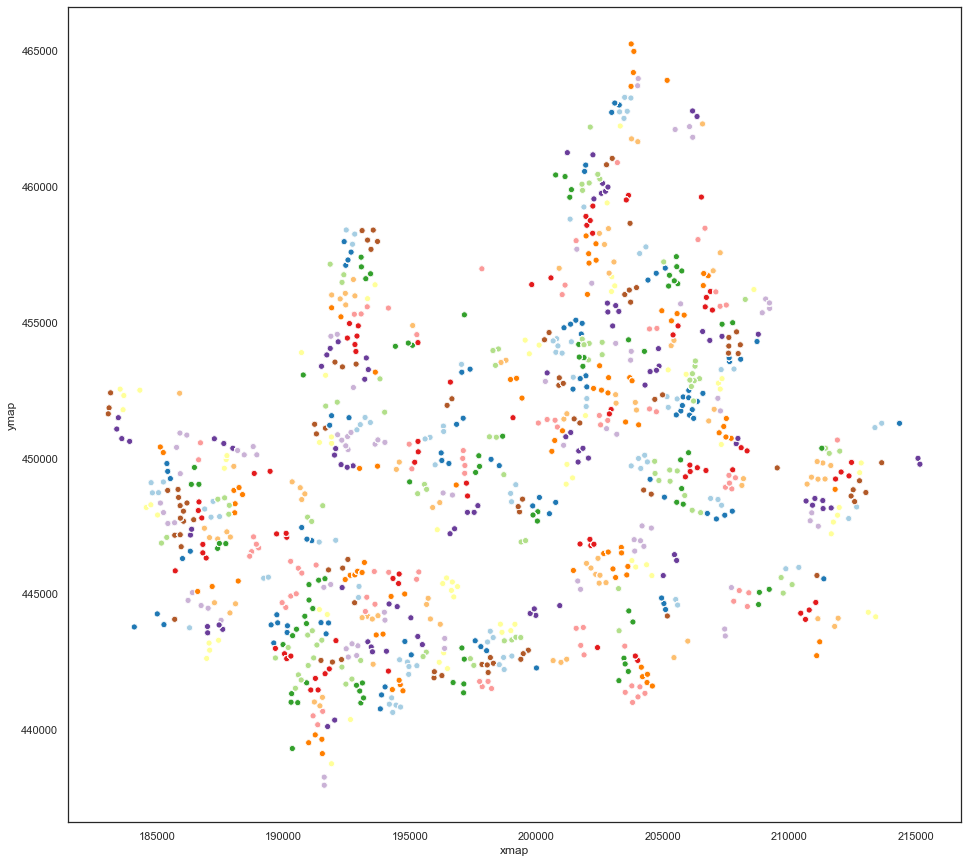

In [100]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='H',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=349),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_H", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### 시군구

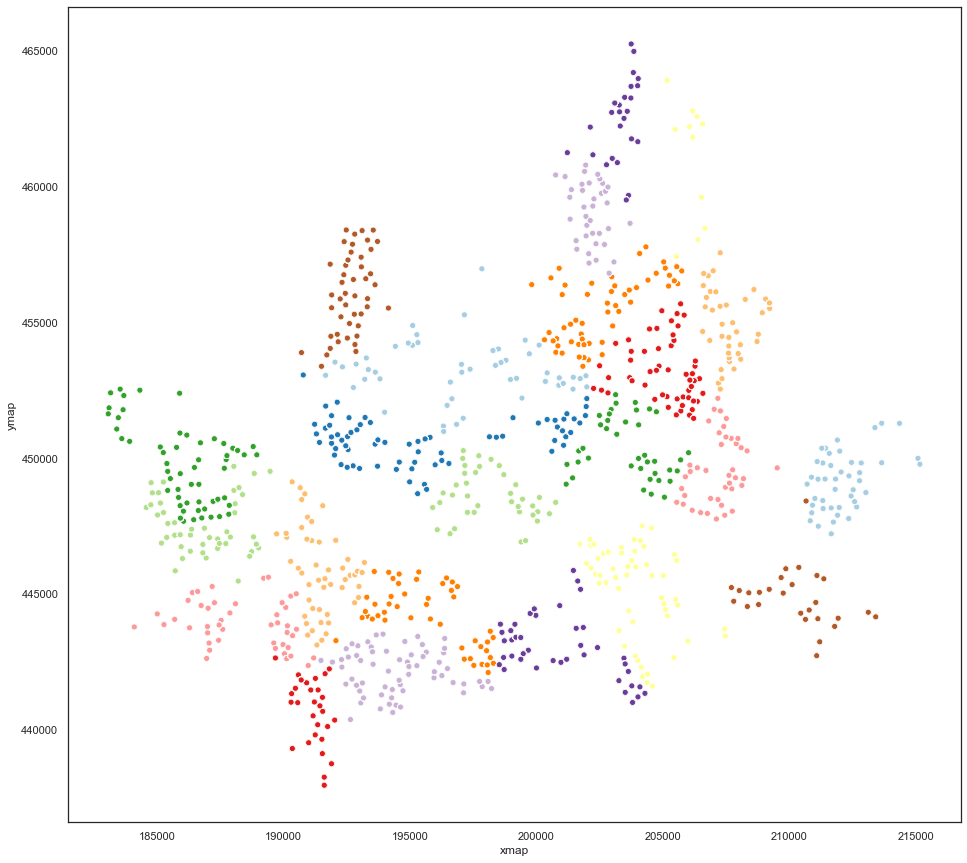

In [101]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='C',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_C", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### K_MEANS

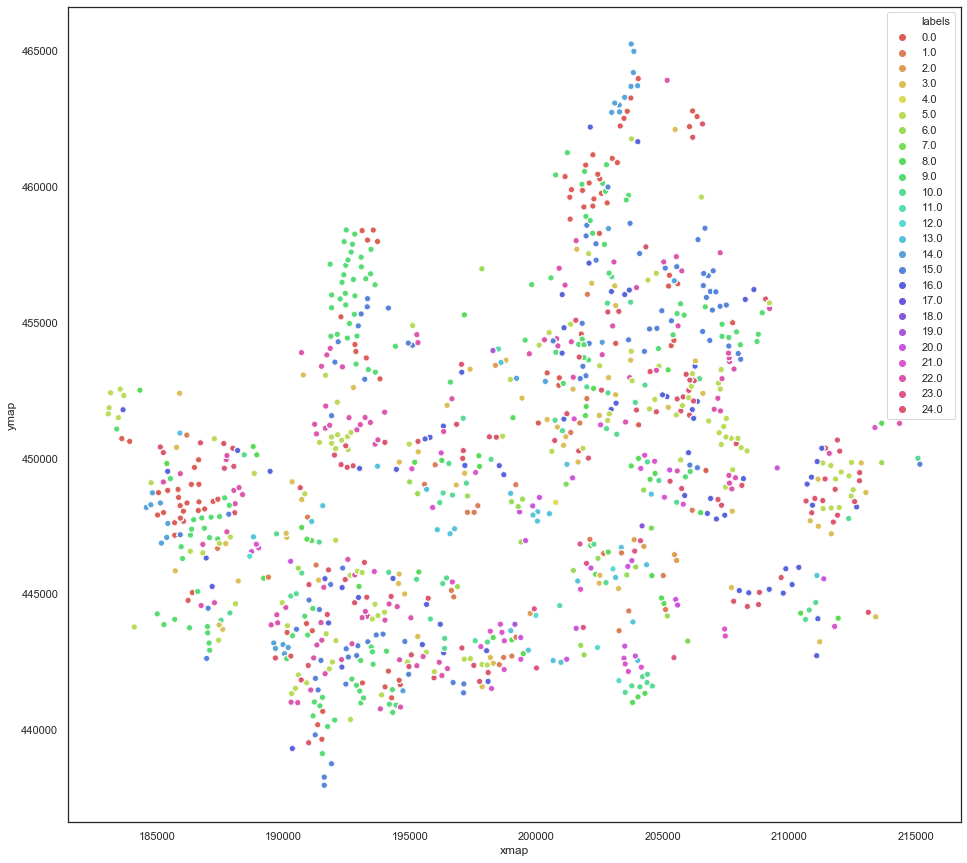

In [102]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='labels',
                
                
                palette=sns.color_palette("hls", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_K", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


## label별 특징

In [104]:
df["district"]

0         1000001
1         1000001
2         1000001
3         1000001
4         1000001
           ...   
113260    1001010
113261    1001010
113262    1001010
113263    1001010
113264    1001010
Name: district, Length: 113265, dtype: int64

In [105]:
X2

,labels,district,x_tsne,y_tsne
0,16.0,1000001,-33.845062,43.858330
1,16.0,1000001,-33.845062,43.858330
2,16.0,1000001,-33.845062,43.858330
3,16.0,1000001,-33.845062,43.858330
4,16.0,1000001,-33.845062,43.858330
...,...,...,...,...
113260,5.0,1001010,53.705574,20.133879
113261,5.0,1001010,53.705574,20.133879
113262,5.0,1001010,53.705574,20.133879
113263,5.0,1001010,53.705303,20.133755


In [106]:
X2.drop(["district"], axis=1, inplace =True)

In [107]:
df_final2 = pd.concat([X2 ,df], axis=1)
df_final2

,labels,x_tsne,y_tsne,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,16.0,-33.845062,43.858330,2015,1000001,CS100001,3.263885e+09,16.5,2,2,...,188530154.0,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878
1,16.0,-33.845062,43.858330,2015,1000001,CS100002,7.520000e+08,2.0,1,1,...,188530154.0,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290
2,16.0,-33.845062,43.858330,2015,1000001,CS100003,1.650000e+08,2.0,0,0,...,188530154.0,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710
3,16.0,-33.845062,43.858330,2015,1000001,CS100004,1.164048e+09,6.0,1,1,...,188530154.0,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529
4,16.0,-33.845062,43.858330,2015,1000001,CS100005,6.667218e+08,3.5,2,2,...,188530154.0,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,5.0,53.705574,20.133879,2019,1001010,CS300008,1.441360e+08,2.0,0,0,...,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000
113261,5.0,53.705574,20.133879,2019,1001010,CS300009,3.067237e+09,2.0,0,0,...,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000
113262,5.0,53.705574,20.133879,2019,1001010,CS300011,1.794132e+07,1.0,0,1,...,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000
113263,5.0,53.705303,20.133755,2019,1001010,CS300016,8.942270e+06,3.0,0,0,...,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000


In [114]:
df_final3= pd.merge(df_final2, maps2, on=['district'])
df_final3

,labels,x_tsne,y_tsne,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,...,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24,xmap,ymap,C,H
0,16.0,-33.845062,43.858330,2015,1000001,CS100001,3.263885e+09,16.5,2,2,...,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878,198799,453610,11110,11110600
1,16.0,-33.845062,43.858330,2015,1000001,CS100002,7.520000e+08,2.0,1,1,...,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290,198799,453610,11110,11110600
2,16.0,-33.845062,43.858330,2015,1000001,CS100003,1.650000e+08,2.0,0,0,...,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710,198799,453610,11110,11110600
3,16.0,-33.845062,43.858330,2015,1000001,CS100004,1.164048e+09,6.0,1,1,...,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529,198799,453610,11110,11110600
4,16.0,-33.845062,43.858330,2015,1000001,CS100005,6.667218e+08,3.5,2,2,...,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698,198799,453610,11110,11110600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,3.0,59.260307,11.630458,2019,1000996,CS300001,6.391276e+07,5.0,1,0,...,0.628672,0.009326,0.008051,0.067294,0.234990,0.269688,211142,449233,11740,11740610
113261,3.0,59.260307,11.630458,2019,1000996,CS300002,4.872386e+08,1.0,0,1,...,0.442115,0.172838,0.102383,0.144051,0.256675,0.187855,211142,449233,11740,11740610
113262,3.0,59.260307,11.630458,2019,1000996,CS300004,2.228855e+08,1.0,0,0,...,0.074540,0.008273,0.112182,0.025233,0.852244,0.002068,211142,449233,11740,11740610
113263,3.0,59.260307,11.630458,2019,1000996,CS300009,1.256928e+08,2.0,0,0,...,0.251153,0.152372,0.276711,0.246535,0.323482,0.000901,211142,449233,11740,11740610


In [109]:
#df_final3.to_csv('df_all.csv', index=False, encoding='utf-8')

In [113]:
label = {}
for i in range(0, 25):
    label.update({
        "label{}".format(i) : df_final3.loc[df_final3.labels == i]
    })


In [115]:
df_final3.groupby(by='labels').size()

labels
0.0     12148
1.0      3150
2.0       443
3.0      5577
4.0        63
5.0     12597
6.0      1914
7.0       178
8.0      4090
9.0     12778
10.0     5967
11.0      245
12.0      551
13.0     3014
14.0     5140
15.0    10837
16.0     7380
17.0       61
18.0       58
19.0      384
20.0     1508
21.0     3360
22.0    12252
23.0      616
24.0     8954
dtype: int64

In [117]:
label["label0"]

,labels,x_tsne,y_tsne,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,...,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24,xmap,ymap,C,H
243,0.0,3.882605,-0.145024,2015,1000004,CS100001,1.396498e+09,22.5,4,1,...,0.646147,0.023117,0.362477,0.142737,0.386270,0.061314,199558,454351,11110,11110650
244,0.0,3.874697,-0.157770,2015,1000004,CS100002,8.200000e+07,1.0,0,0,...,0.526894,0.012542,0.452378,0.186895,0.342539,0.005646,199558,454351,11110,11110650
245,0.0,3.874697,-0.157770,2015,1000004,CS100004,7.760000e+08,1.5,1,0,...,0.747004,0.017704,0.405980,0.191739,0.370388,0.014189,199558,454351,11110,11110650
246,0.0,3.877696,-0.153177,2015,1000004,CS100005,1.125643e+09,12.5,3,1,...,0.747928,0.046162,0.323343,0.138118,0.338093,0.078820,199558,454351,11110,11110650
247,0.0,3.874697,-0.157770,2015,1000004,CS100006,5.200000e+07,2.0,0,2,...,0.777002,0.024881,0.246334,0.177850,0.420509,0.077076,199558,454351,11110,11110650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112950,0.0,-32.179787,-3.559808,2019,1000361,CS300009,4.518017e+07,2.0,0,0,...,0.002654,0.079352,0.265127,0.119427,0.536093,0.000000,203467,462516,11320,11320690
112951,0.0,-32.178677,-3.559994,2019,1000361,CS300013,4.313922e+07,1.0,0,0,...,0.015965,0.024881,0.344595,0.541473,0.089052,0.000000,203467,462516,11320,11320690
112952,0.0,-32.179302,-3.559770,2019,1000361,CS300014,3.190826e+07,1.0,0,0,...,0.226092,0.000000,0.228927,0.333689,0.377115,0.060269,203467,462516,11320,11320690
112953,0.0,-32.179234,-3.559890,2019,1000361,CS300015,2.113529e+09,1.0,0,0,...,0.090418,0.119670,0.153178,0.480809,0.246342,0.000000,203467,462516,11320,11320690


In [120]:
sales_total=[]
for i in range(0,25):
    sales_total.append(
        label["label{}".format(i)].iloc[:,6].mean()
    )

s_store_no_of_store=[]
for i in range(0,25):
    s_store_no_of_store.append(
        label["label{}".format(i)].iloc[:,7].mean()
    )
    
s_store_no_of_opening=[]
for i in range(0,25):
    s_store_no_of_opening.append(
        label["label{}".format(i)].iloc[:,8].mean()
    )
    
s_store_no_of_closing=[]
for i in range(0,25):
    s_store_no_of_closing.append(
        label["label{}".format(i)].iloc[:,9].mean()
    )
    
s_work_female=[]
for i in range(0,25):
    s_work_female.append(
        label["label{}".format(i)].iloc[:,10].mean()
    )

s_float_male=[]
for i in range(0,25):
    s_float_male.append(
        label["label{}".format(i)].iloc[:,11].mean()
    )
    
s_float_female=[]
for i in range(0,25):
    s_float_female.append(
        label["label{}".format(i)].iloc[:,12].mean()
    )
    
b_facil_total=[]
for i in range(0,25):
    b_facil_total.append(
        label["label{}".format(i)].iloc[:,13].mean()
    )

b_apt_avg_price=[]
for i in range(0,25):
    b_apt_avg_price.append(
        label["label{}".format(i)].iloc[:,14].mean()
    )
    
b_income_avg_monthly_inc=[]
for i in range(0,25):
    b_income_avg_monthly_inc.append(
        label["label{}".format(i)].iloc[:,15].mean()
    )
    
sales_weekday=[]
for i in range(0,25):
    sales_weekday.append(
        label["label{}".format(i)].iloc[:,16].mean()
    )
    
sales_female=[]
for i in range(0,25):
    sales_female.append(
        label["label{}".format(i)].iloc[:,17].mean()
    )
    
sales_2030s=[]
for i in range(0,25):
    sales_2030s.append(
        label["label{}".format(i)].iloc[:,18].mean()
    )
    
sales_06_11=[]
for i in range(0,25):
    sales_06_11.append(
        label["label{}".format(i)].iloc[:,19].mean()
    )
    
sales_11_14=[]
for i in range(0,25):
    sales_11_14.append(
        label["label{}".format(i)].iloc[:,20].mean()
    )
    
sales_14_17=[]
for i in range(0,25):
    sales_14_17.append(
        label["label{}".format(i)].iloc[:,21].mean()
    )
    
sales_17_21=[]
for i in range(0,25):
    sales_17_21.append(
        label["label{}".format(i)].iloc[:,22].mean()
    )
    
sales_21_24=[]
for i in range(0,25):
    sales_21_24.append(
        label["label{}".format(i)].iloc[:,23].mean()
    )

In [122]:
mean_list=[sales_total,
 s_store_no_of_store,
 s_store_no_of_opening,
 s_store_no_of_closing,
 s_work_female,
 s_float_male,
 s_float_female,
 b_facil_total,
 b_apt_avg_price,
 b_income_avg_monthly_inc,
 sales_weekday,
 sales_female,
 sales_2030s,
 sales_06_11,
 sales_11_14,
 sales_14_17,
 sales_17_21,
 sales_21_24]


In [123]:
b=np.array(mean_list).T

In [124]:
df_mean=pd.DataFrame(b)
df_mean.columns=a


In [125]:
df_mean

,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,6.933371e+08,4.311409,0.691143,0.718143,560.847959,391721.578367,405004.071617,93.656651,1.070505e+08,3.099172e+06,0.745742,0.459402,0.352562,0.068864,0.185908,0.227570,0.333318,0.125141
1,1.005419e+09,4.501270,0.642222,0.610159,2425.953016,419881.164444,377221.071111,103.491587,3.079147e+08,4.746083e+06,0.785495,0.428170,0.342638,0.074105,0.226662,0.234289,0.307812,0.116127
2,1.592878e+09,4.749436,0.595937,0.573363,2121.880361,417337.101580,420937.067720,116.762980,5.428248e+08,5.435221e+06,0.773561,0.462013,0.329887,0.073482,0.253285,0.259618,0.277817,0.097426
3,9.194026e+08,4.621750,0.662543,0.681370,1680.841313,396657.258562,395031.578985,104.008069,2.053817e+08,3.938348e+06,0.768452,0.444472,0.328750,0.072339,0.209705,0.233161,0.319239,0.116917
4,1.616511e+09,4.095238,0.619048,0.555556,1118.619048,282973.571429,347550.650794,93.888889,1.287339e+09,5.479529e+06,0.755716,0.509400,0.434505,0.058851,0.253153,0.257699,0.304835,0.100002
5,7.441398e+08,4.274669,0.612130,0.624037,1134.086211,377050.851631,374509.559022,105.031119,1.572481e+08,3.565333e+06,0.756577,0.451096,0.337285,0.069088,0.197798,0.230703,0.327107,0.122942
6,1.130055e+09,4.530564,0.641066,0.620690,2809.322884,332859.926332,309018.500522,98.577847,3.729505e+08,5.021680e+06,0.763843,0.442440,0.345335,0.071220,0.225727,0.245918,0.310417,0.106835
7,9.919922e+08,4.320225,0.567416,0.662921,3163.803371,186763.831461,189784.983146,83.073034,8.471139e+08,5.647348e+06,0.783577,0.495917,0.301456,0.064724,0.215592,0.248977,0.308109,0.121127
8,8.412943e+08,4.255257,0.591443,0.571883,2368.707090,357946.567971,316919.123961,99.041932,2.535966e+08,4.254139e+06,0.782022,0.422029,0.322614,0.077740,0.217173,0.232609,0.310011,0.115123
9,6.933819e+08,4.171897,0.616450,0.649476,628.833307,376297.935514,377812.678275,98.547230,1.194850e+08,3.223388e+06,0.743419,0.459178,0.344683,0.067463,0.184277,0.225999,0.335413,0.127681


In [126]:
means=df_mean.sort_values(by=df_mean.columns[0], ascending=False)

In [128]:
means_list=[]
for i in range(0,17):
    means_list.append(
        df_mean.iloc[:,[i]].sort_values(by=df_mean.columns[i], ascending=False)
    )


<Figure size 1080x1080 with 0 Axes>

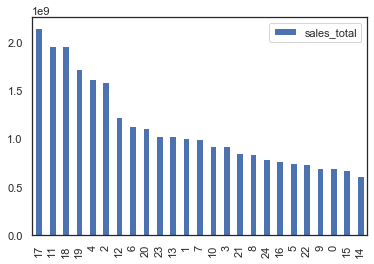

In [131]:
plt.figure(figsize=(15,15))
means_list[0].plot.bar()
plt.savefig(fname="a")

<Figure size 1080x1080 with 0 Axes>

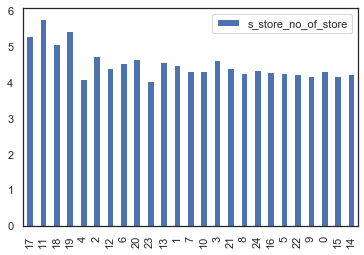

In [132]:
plt.figure(figsize=(15,15))
means.iloc[:,[1]].plot.bar()
plt.savefig(fname="b")

<Figure size 1080x1080 with 0 Axes>

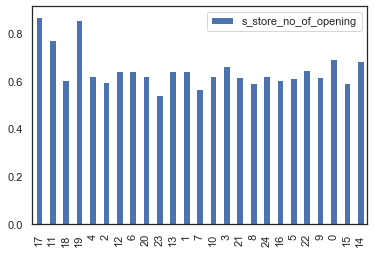

In [133]:
plt.figure(figsize=(15,15))
means.iloc[:,[2]].plot.bar()
plt.savefig(fname="c")

<Figure size 1080x1080 with 0 Axes>

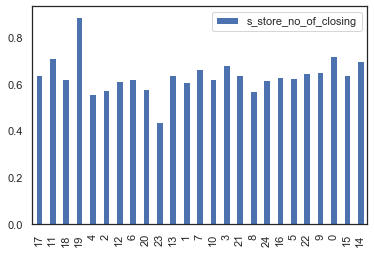

In [134]:
plt.figure(figsize=(15,15))
means.iloc[:,[3]].plot.bar()
plt.savefig(fname="d")

<Figure size 1080x1080 with 0 Axes>

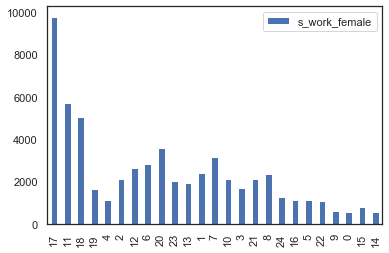

In [135]:
plt.figure(figsize=(15,15))
means.iloc[:,[4]].plot.bar()
plt.savefig(fname="e")

<Figure size 1080x1080 with 0 Axes>

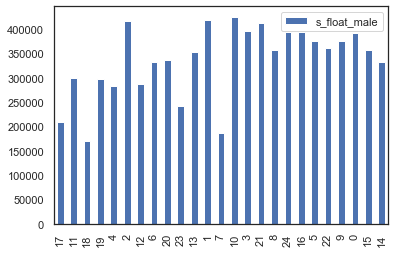

In [136]:
plt.figure(figsize=(15,15))
means.iloc[:,[5]].plot.bar()
plt.savefig(fname="f")

<Figure size 1080x1080 with 0 Axes>

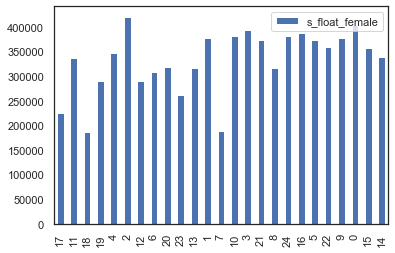

In [137]:
plt.figure(figsize=(15,15))
means.iloc[:,[6]].plot.bar()
plt.savefig(fname="g")

<Figure size 1080x1080 with 0 Axes>

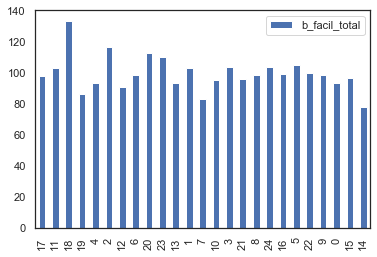

In [138]:
plt.figure(figsize=(15,15))
means.iloc[:,[7]].plot.bar()
plt.savefig(fname="h")

<Figure size 1080x1080 with 0 Axes>

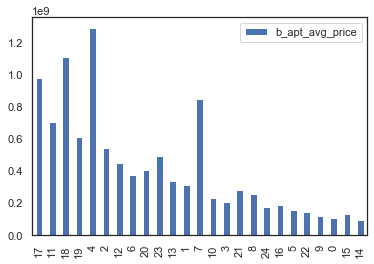

In [139]:
plt.figure(figsize=(15,15))
means.iloc[:,[8]].plot.bar()
plt.savefig(fname="i")

<Figure size 1080x1080 with 0 Axes>

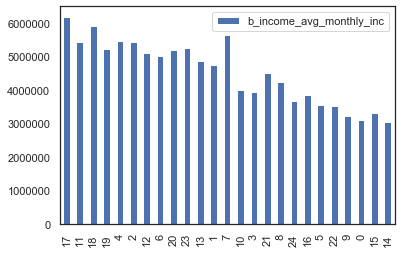

In [140]:
plt.figure(figsize=(15,15))
means.iloc[:,[9]].plot.bar()
plt.savefig(fname="j")

<Figure size 1080x1080 with 0 Axes>

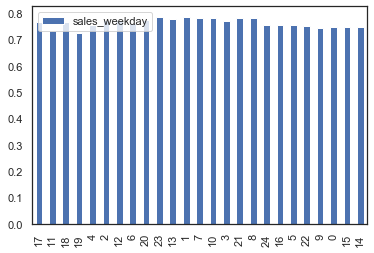

In [141]:
plt.figure(figsize=(15,15))
means.iloc[:,[10]].plot.bar()
plt.savefig(fname="k")

<Figure size 1080x1080 with 0 Axes>

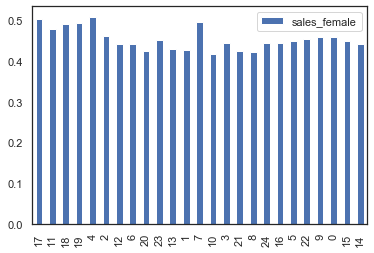

In [142]:
plt.figure(figsize=(15,15))
means.iloc[:,[11]].plot.bar()
plt.savefig(fname="l")

<Figure size 1080x1080 with 0 Axes>

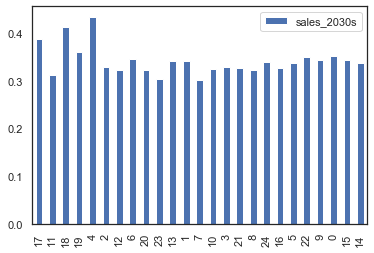

In [143]:
plt.figure(figsize=(15,15))
means.iloc[:,[12]].plot.bar()
plt.savefig(fname="m")

<Figure size 1080x1080 with 0 Axes>

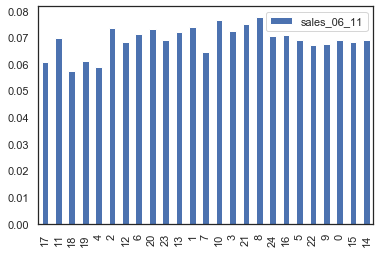

In [144]:
plt.figure(figsize=(15,15))
means.iloc[:,[13]].plot.bar()
plt.savefig(fname="n")

<Figure size 1080x1080 with 0 Axes>

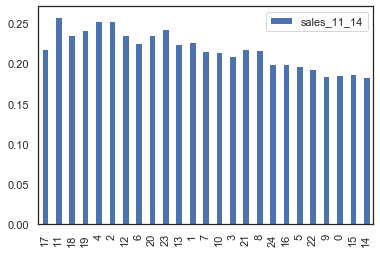

In [145]:
plt.figure(figsize=(15,15))
means.iloc[:,[14]].plot.bar()
plt.savefig(fname="o")

<Figure size 1080x1080 with 0 Axes>

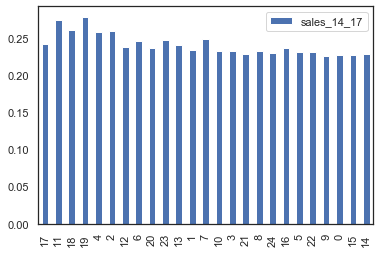

In [146]:
plt.figure(figsize=(15,15))
means.iloc[:,[15]].plot.bar()
plt.savefig(fname="p")

<Figure size 1080x1080 with 0 Axes>

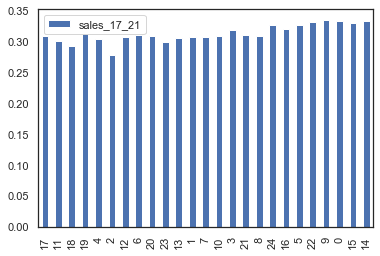

In [147]:
plt.figure(figsize=(15,15))
means.iloc[:,[16]].plot.bar()
plt.savefig(fname="q")

<Figure size 1080x1080 with 0 Axes>

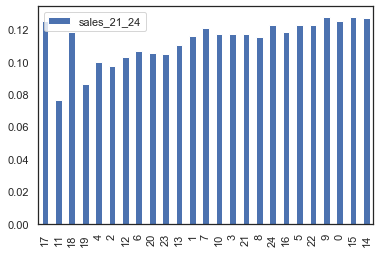

In [148]:
plt.figure(figsize=(15,15))
means.iloc[:,[17]].plot.bar()
plt.savefig(fname="r")